In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from glob import glob

In [4]:
labels = ["DG14(P) - DG13(O) Bond Breaking",
          "DG14(P) - WAT713(O) Bond Forming",
          "WAT731(O) - WAT731(H) Bond Breaking",
          "H304(ND1) - WAT731(O) Proton Transfer",
          "DA14(O3') - Mg372 Coordination", 
          "DG14(OP2) - Mg372 Coordination",
          "N325(OD1) - Mg372 Coordination",
          "WAT602(O) - Mg372 Coordination",
          "WAT613(O) - Mg372 Coordination",
          "WAT614(O) - Mg372 Coordination",]

In [25]:
n_windows=42
n_cvs=10

cvs_avg = np.zeros((n_windows, n_cvs))
cvs_std = np.zeros((n_windows, n_cvs))

for i in range(n_windows):
        fnames = sorted(glob('../%02d/d??.dat' % i))    
        arrays = [np.loadtxt(f, usecols=1)[600::] for f in fnames[:]]
        for j in range(n_cvs):
            average = np.average(arrays[j])
            std = np.std(arrays[j])
            cvs_avg[i,j] = average
            cvs_std[i,j] = std
            
cv_avg = np.transpose(cvs_avg)
cv_std = np.transpose(cvs_std)

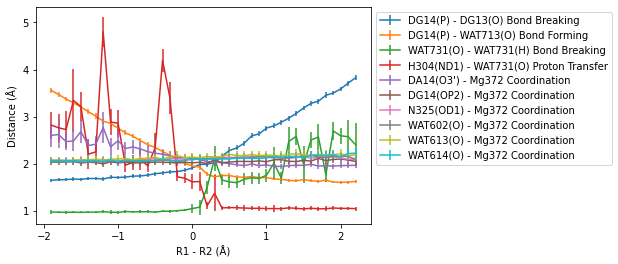

In [26]:
cv = np.linspace(-1.90,2.20,num=42)

for i in range(n_cvs):
    plt.errorbar(cv, cv_avg[i], yerr=cv_std[i], label=labels[i])
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel("R1 - R2 (Å)")
    plt.ylabel("Distance (Å)")
    
plt.savefig('step6_30.png', dpi=300, bbox_inches='tight')